# Day 4

In [101]:
import numpy as np
import pandas as pd

In [115]:
pd.__version__

'1.4.2'

In [102]:
dtypes_dict = {
	'Company Name': object,
	'company contact': object,
	'company email': object,
	'company phone': object,
	'Address': object,
	'City': object,
	'State': object,
	'Postcode': object,
	'Industry': object,
	'Industry descr': object,
	'Company Type': object,
	'Current fulltime': float,
	'Job created': float,
	'Job retain': float,
	'Effective Date': object,
	'Total Savings': float,
	'Savings from beginning receiving benefits': object,
	'Borough': object,
	'Latitude': float,
	'Longitude': float,
	'Community Board': object,
	'Council District': object,
	'Census Tract': object,
	'BIN': object,
	'BBL': object,
	'NTA': object
}

dataset = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', 
                      dtype=dtypes_dict, 
                      parse_dates=['Effective Date'],
                      infer_datetime_format=True)

In [103]:
dataset.dtypes

Company Name                                         object
company contact                                      object
company email                                        object
company phone                                        object
Address                                              object
City                                                 object
State                                                object
Postcode                                             object
Industry                                             object
Industry descr                                       object
Company Type                                         object
Current fulltime                                    float64
Job created                                         float64
Job retain                                          float64
Effective Date                               datetime64[ns]
Total Savings                                       float64
Savings from beginning receiving benefit

## Question 1 
How many different companies are represented in the dataset?

__Answer.__ The dataset contains __439__ different companies.

In [104]:
dataset['Company Name'].dropna().nunique()

439

## Question 2 
What is the total number of jobs created for businesses in Queens?

__Answer.__ The total number of jobs created is __102__.

In [105]:
dataset[dataset['Borough'] == 'Queens']['Job created'].sum()

102.0

## Question 3
How many different unique email domains names are there in the data set?

__Answer.__ There are __356__ different unique email domain names.

In [106]:
dataset['company email'].str.split(pat='@', expand=True).get(1).dropna().nunique()

356

## Question 4
Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

__Answer.__ Please see the analysis that follows.

In [107]:
nta_list = dataset.groupby('NTA').size().reset_index(name='business_count')
relevant_ntas = nta_list[nta_list['business_count'] >= 5]
relevant_businesses = pd.merge(dataset, relevant_ntas, on='NTA')
result = pd.pivot_table(relevant_businesses, index='NTA', values=['Total Savings', 'Job created'], aggfunc='mean')
result

,Job created,Total Savings
NTA,,
Battery Park City-Lower Manhattan,NaN,469890.796667
Bushwick South,10.000000,26140.455000
Carroll Gardens-Columbia Street-Red Hook,NaN,24337.390000
College Point,2.000000,17159.372857
Crown Heights North,NaN,4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,NaN,59950.340000
East New York,15.000000,48433.093333
East Williamsburg,NaN,13990.626364
Greenpoint,NaN,9753.649286


## Question 5
Save your result for the previous question as a CSV file.

In [108]:
result.to_csv('result.csv')

# Day 5

In [109]:
import matplotlib.pyplot as plt

[C]reate a scatter plot of jobs created versus average savings. Use both a 
standard ...

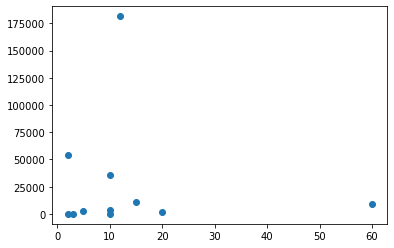

In [110]:
plt.scatter(dataset['Job created'], dataset['Total Savings'])

... and a logarithmic scale for the average savings.

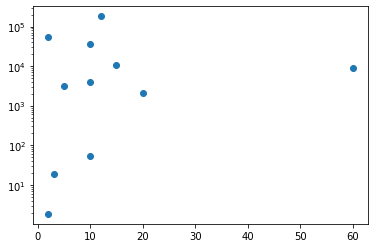

In [111]:
fig, ax = plt.subplots()
ax.scatter(dataset['Job created'], dataset['Total Savings'])
ax.set_yscale('log')

... histogram of the log of the average total savings. ...

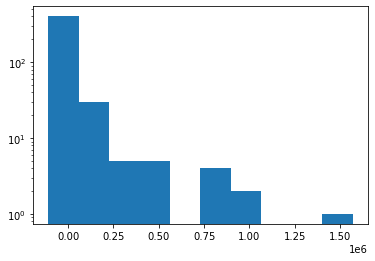

In [112]:
fig, axs = plt.subplots()
axs.hist(dataset['Total Savings'])
axs.set_yscale('log')

line plot of the total jobs created for each month.

In [113]:
monthly_totals = dataset.groupby([dataset['Effective Date'].dt.year.rename('year'), 
                 dataset['Effective Date'].dt.month.rename('month')]).sum()
monthly_totals['Job created']

year  month
1993  2        15.0
2004  3        10.0
2005  2        12.0
      3         0.0
      6         0.0
               ... 
2020  3         0.0
      4         0.0
      5         0.0
      6         0.0
      7         0.0
Name: Job created, Length: 140, dtype: float64

<AxesSubplot:xlabel='year,month'>

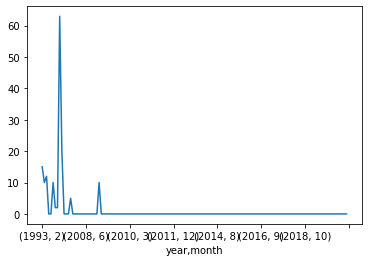

In [114]:
fig, axs = plt.subplots()
monthly_totals['Job created'].plot()